## 第一课 HomeCredit项目实操

In [8]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import chi2
import statsmodels.discrete.discrete_model as dm_

sys.path.insert(0, os.path.abspath('../'))

%matplotlib inline

from lec1.preprocessor import *
from lec1.coverage import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 加载数据

In [ ]:
data_path = f"{os.path.abspath('.')}/home-credit-default-risk/"

application_train, bureau, bureau_balance, credit_card_balance, \
installment_payments, pos_cash_balance, previous_application = load_data(data_path)

## 基本统计

In [13]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [14]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


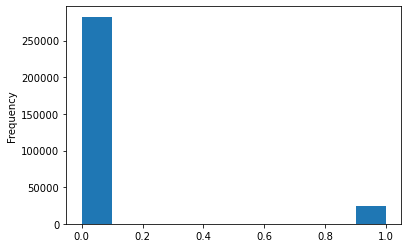

In [15]:
application_train['TARGET'].plot.hist();

In [16]:
_, _ = application_stat(application_train, show_res=True)

# rows in application table:  307511
# users in application table:  307511
# default users in application table:  24825
% default users in application table:  0.08072881945686496


## 统计覆盖度

In [17]:
application_coverage(application_train, bureau, 'bureau')
bureau_ = bureau.merge(bureau_balance, on='SK_ID_BUREAU', how='inner')
application_coverage(application_train, bureau_, 'bureau_balance')
application_coverage(application_train, pos_cash_balance, 'pos_cash_balance')
application_coverage(application_train, credit_card_balance, 'credit_card_balance')
application_coverage(application_train, installment_payments, 'installment_payments')
application_coverage(application_train, previous_application, 'previous_application')

# all users covered by bureau 263491
% all users covered by bureau 0.8568506492450677
# default users covered by bureau 20368
% default users covered by bureau 0.8204632426988923
# all users covered by bureau_balance 92231
% all users covered by bureau_balance 0.29992748226892696


MemoryError: Unable to allocate 8.00 GiB for an array with shape (73, 14701612) and data type float64

## Previous Features

In [22]:
previous_application_ = previous_application[[x for x in previous_application.columns if x != 'SK_ID_CURR']]
pos_cash_balance_prev = previous_application_.merge(pos_cash_balance, on='SK_ID_PREV', how='inner')
credit_card_balance_prev = previous_application_.merge(credit_card_balance, on='SK_ID_PREV', how='inner')
installment_payments_prev = previous_application_.merge(installment_payments, on='SK_ID_PREV', how='inner')

application_coverage(application_train, pos_cash_balance_prev, 'pos_cash_balance')
application_coverage(application_train, credit_card_balance_prev, 'credit_card_balance')
application_coverage(application_train, installment_payments_prev, 'installment_payments')

# all users covered by pos_cash_balance 286967
% all users covered by pos_cash_balance 0.9331926337594427
# default users covered by pos_cash_balance 23398
% default users covered by pos_cash_balance 0.9425176233635448
# all users covered by credit_card_balance 77934
% all users covered by credit_card_balance 0.2534348364773943
# default users covered by credit_card_balance 7044
% default users covered by credit_card_balance 0.28374622356495466
# all users covered by installment_payments 289406
% all users covered by installment_payments 0.941124057350794
# default users covered by installment_payments 23700
% default users covered by installment_payments 0.9546827794561934


## 小结
* credit card balance 覆盖度较低 (~30%)
* 其他表的覆盖度较高